# Split Plots

In [1]:
# Libraries
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import json
from simulation.trajectory_sampler import *
from envs import *
from policies import *
from data_processors import *
from tqdm import tqdm

In [2]:
# Path to results
path = [
    "/Users/Admin/OneDrive/Documenti/GitHub/learnRL/results/pg/pg_test_100_clr_00001_lq_100_lingauss_policy_1_var_01",
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/pg_results.json"
    file = open(name)
    data.append(json.load(file))

In [3]:
print(list(data[0].keys()))

['performance', 'best_theta', 'thetas_history', 'last_theta', 'best_perf', 'performance_det']


<Figure size 640x480 with 0 Axes>

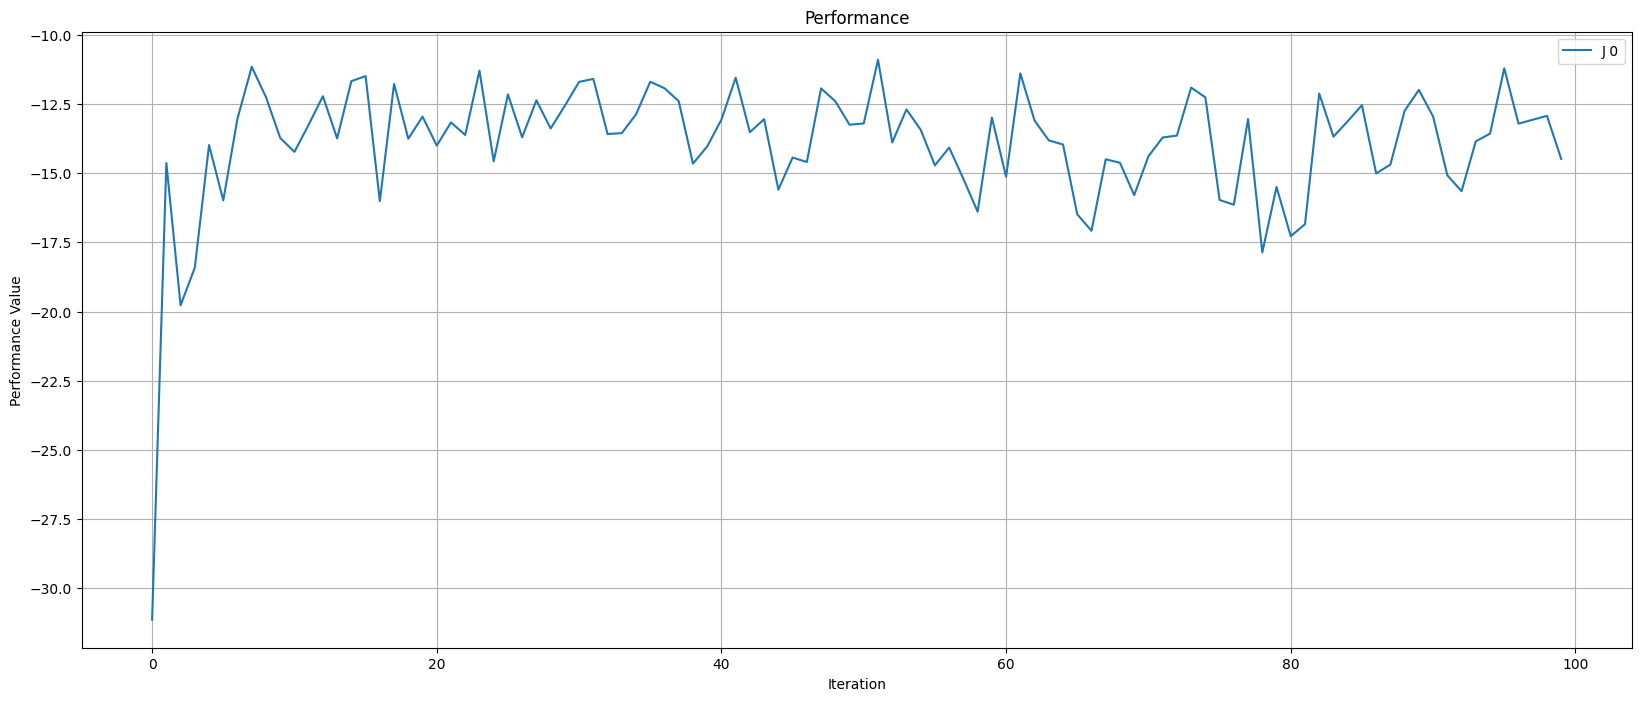

In [4]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

In [5]:
# Path to results
path = [
    "/Users/Admin/OneDrive/Documenti/GitHub/learnRL/results/split/split_test_100_clr_00001_lq_100_split_policy_1_var_01",
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

In [6]:
print(list(data[0].keys()))

['performance', 'best_theta', 'thetas_history', 'last_theta', 'best_perf', 'performance_det']


<Figure size 640x480 with 0 Axes>

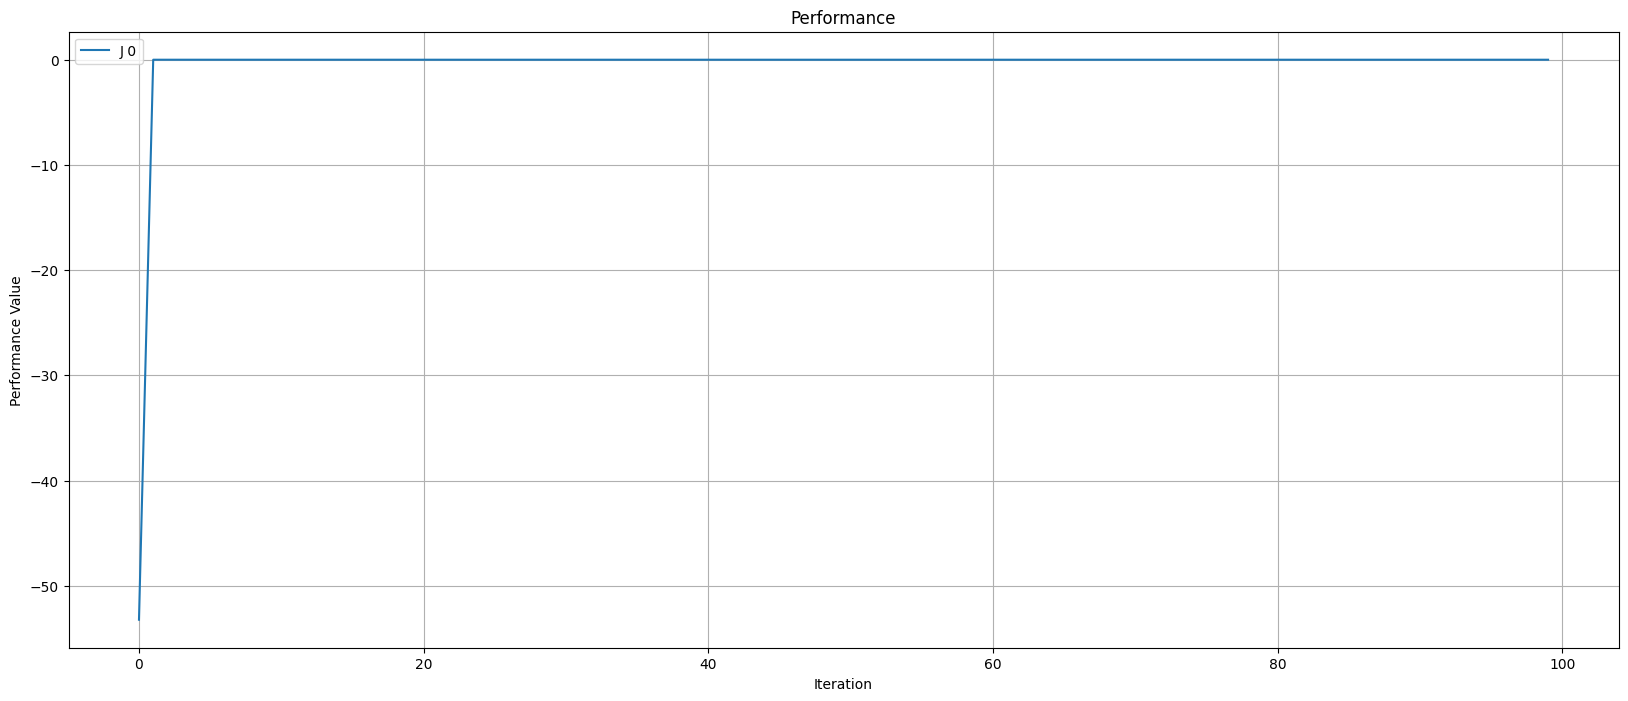

In [7]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

In [8]:
# Path to results
path = [
    "/Users/Admin/OneDrive/Documenti/GitHub/learnRL/results/split_angles/split_angles_100_clr_00001_lq_10_split_policy_1_var_01",
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_angles_results.json"
    file = open(name)
    data.append(json.load(file))

<Figure size 640x480 with 0 Axes>

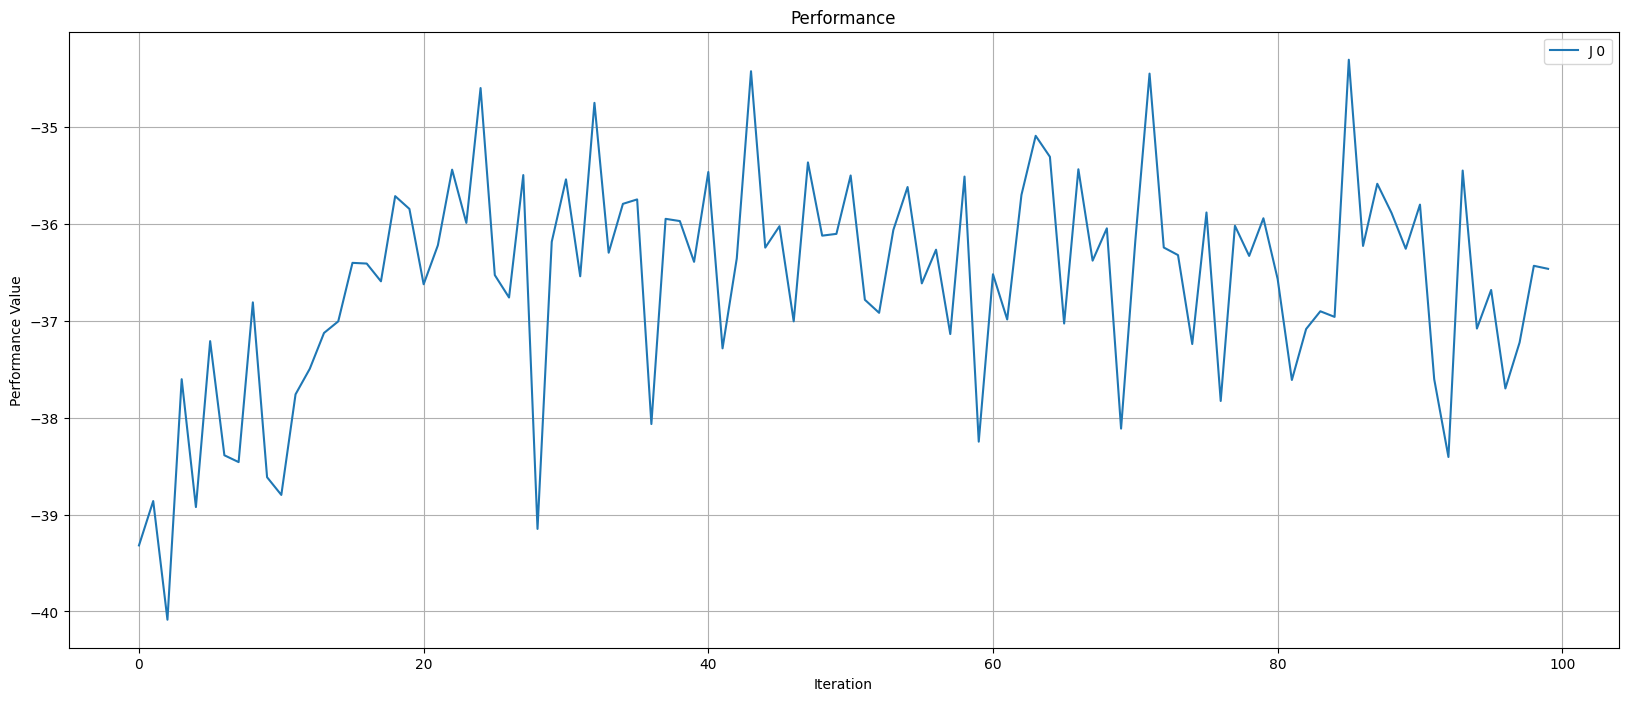

In [9]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

In [12]:
# Path to results
path = [
    "/Users/Admin/OneDrive/Documenti/GitHub/learnRL/results/split_VM/split_VM_100_clr_00001_lq_50_split_policy_1_var_01",
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_VM_results.json"
    file = open(name)
    data.append(json.load(file))

<Figure size 640x480 with 0 Axes>

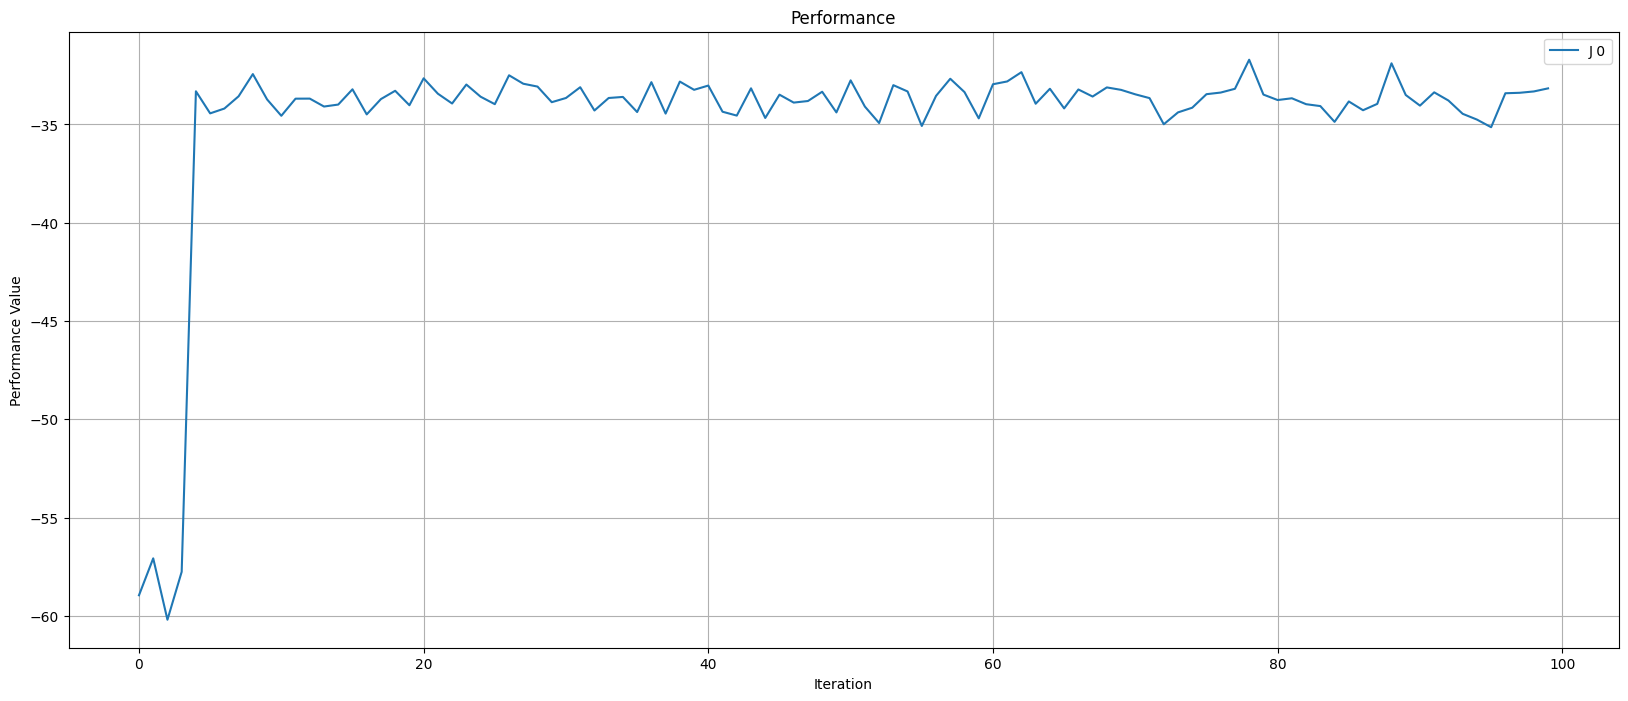

In [13]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()